## Experiment 5.
##### This experiment compares various pre-trained models to see how they perform in comparison KyleNet
##### The pre-trained models used are:
- VGG-19
- ResNet50
- Xception
- DenseNet121
- InceptionV3

##### The hyperparameters & conditions for this experiment are:
- 6 epochs
- 128 batch size
- 1e-4 learning rate
- Balanced Dataset + Dataset Shuffle
- No Image Augmentation

In [2]:
import tensorflow as tf
from tensorflow.python.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.python.keras.models import Model, load_model
from KyleNet import KyleNet
from pathlib import Path
from tensorflow.keras.applications import VGG19, ResNet50, Xception, DenseNet121, InceptionV3
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Get the metadata
META = Path(".").resolve().parent.joinpath("metadata.csv")

##### Check if the experiment is using the CPU or GPU version of TF

In [2]:
if tf.test.gpu_device_name():
    print(f"GPU Device: {tf.test.gpu_device_name()}\n")
else:
    print("Running off of CPU\n")

GPU Device: /device:GPU:0



##### Loops through all the pre-trained models to fetch the results, each model gets saved

In [3]:
models = {}

for model in [VGG19, ResNet50, Xception, DenseNet121, InceptionV3]:
    print(f"\nTraining Model: {model.__name__}")

    # Configure the pre-trained model and freeze the input layers
    base_model = model(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    # FC layers from KyleNet
    output = Flatten()(base_model.output)
    output = Dense(32, activation="relu")(output)
    output = BatchNormalization()(output)
    output = Dense(1, activation="sigmoid")(output)

    base_model = Model(base_model.input, output)
    base_model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

    # The KyleNet model gets swapped out for the pre-trained model
    exp5 = KyleNet(META,
                   f"Experiment 5 - {model.__name__}",
                   epochs=6,
                   balance_dataset=True)
    exp5.model = base_model

    # Save and train/evaluate the model
    exp5.train()
    exp5.evaluate()
    exp5.predict()
    exp5.save()

    models[model.__name__] = exp5


Training Model: VGG19
Found 57830 validated image filenames belonging to 2 classes.
Found 19276 validated image filenames belonging to 2 classes.
Epoch 1/6
451/451 [==============================] - 407s 903ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.0402 - val_accuracy: 0.9907

##### View the classification report of each model

In [5]:
for model in models:
    print(f"{'-'*50}\nReport for {model}\n")
    models[model].metric_report()

--------------------------------------------------
Report for VGG19

              precision    recall  f1-score   support

    COVID-19       1.00      0.99      0.99      9741
   NON-COVID       0.99      1.00      0.99      9535

    accuracy                           0.99     19276
   macro avg       0.99      0.99      0.99     19276
weighted avg       0.99      0.99      0.99     19276

--------------------------------------------------
Report for ResNet50

              precision    recall  f1-score   support

    COVID-19       0.99      0.99      0.99      9593
   NON-COVID       0.99      0.99      0.99      9683

    accuracy                           0.99     19276
   macro avg       0.99      0.99      0.99     19276
weighted avg       0.99      0.99      0.99     19276

--------------------------------------------------
Report for Xception

              precision    recall  f1-score   support

    COVID-19       0.98      1.00      0.99      9650
   NON-COVID       1.00 

##### View the acc/loss graphs of each model

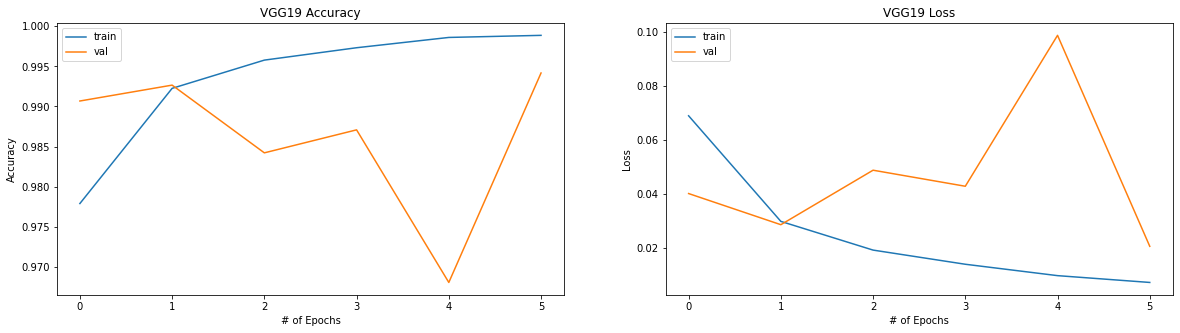

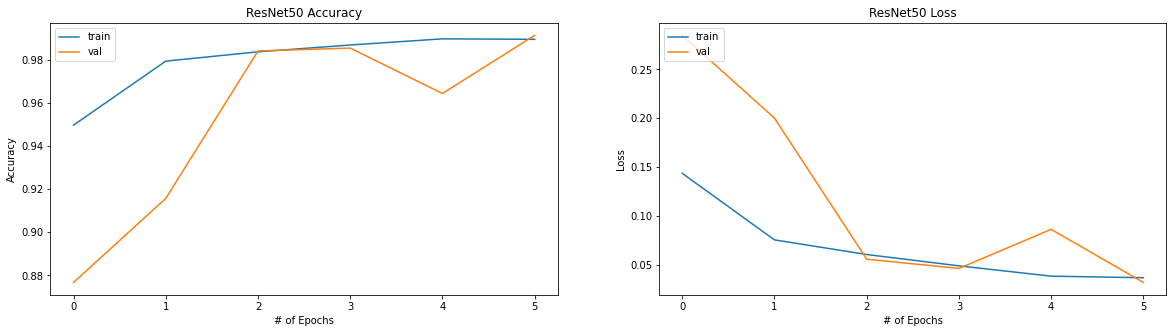

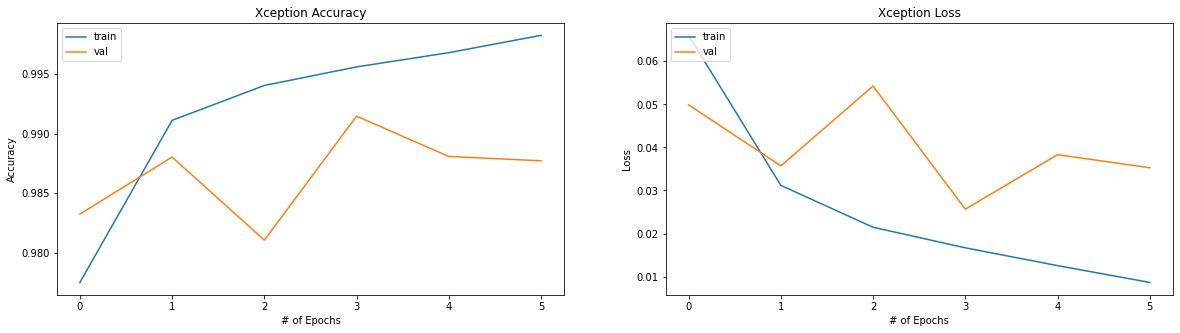

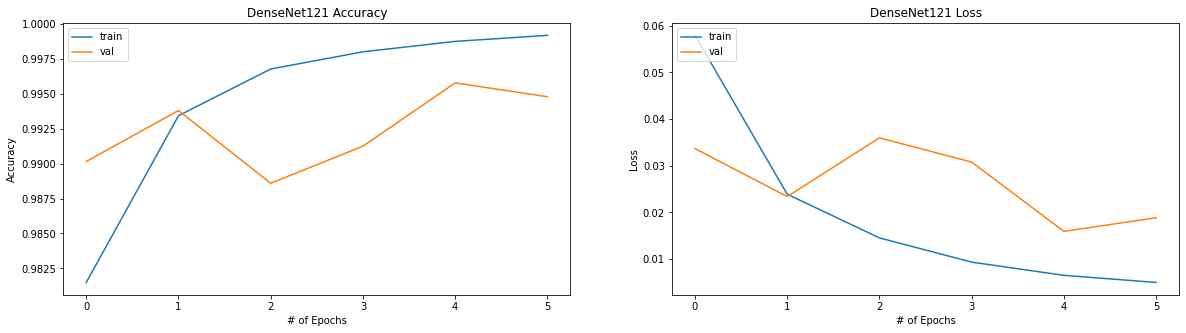

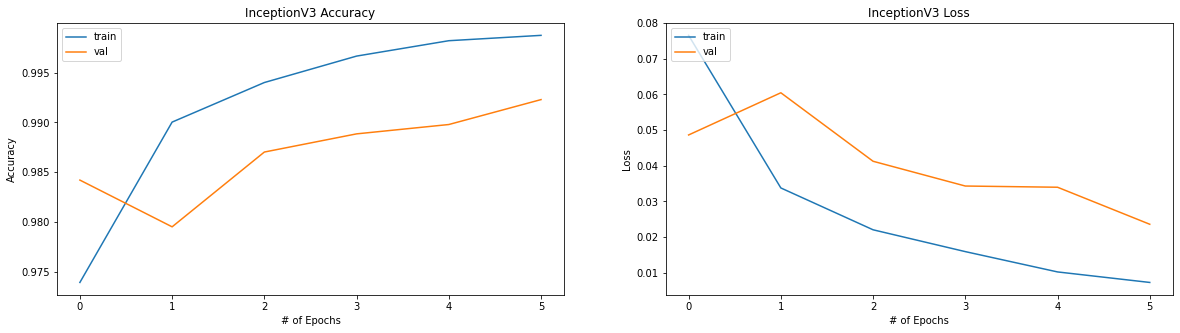

In [6]:
for model in models:
    models[model].plot_history(acc_title = f"{model} Accuracy",
                              loss_title = f"{model} Loss")

##### Confirm the models got stored correctly

In [21]:
models

{'VGG19': <KyleNet.KyleNet at 0x299a1419ca0>,
 'ResNet50': <KyleNet.KyleNet at 0x29b12026d60>,
 'Xception': <KyleNet.KyleNet at 0x29b56537970>,
 'DenseNet121': <KyleNet.KyleNet at 0x29b68c6c0d0>,
 'InceptionV3': <KyleNet.KyleNet at 0x29b82696f10>}

##### VGG-19 Confusion Matrix

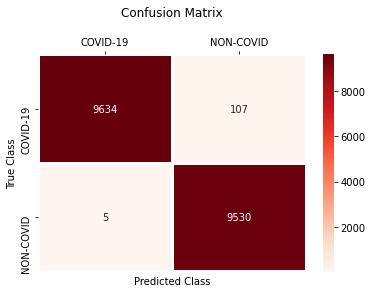

In [29]:
models["VGG19"].confusion_mat()

##### ResNet50 Confusion Matrix

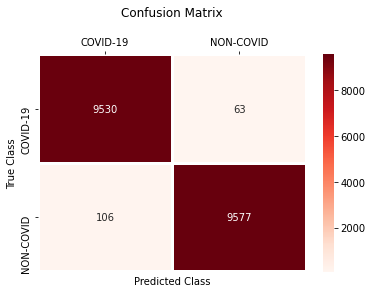

In [30]:
models["ResNet50"].confusion_mat()

##### Xception Confusion Matrix

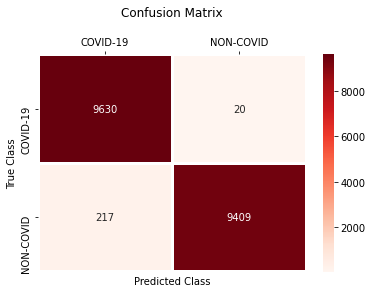

In [31]:
models["Xception"].confusion_mat()

##### DenseNet121 Confusion Matrix

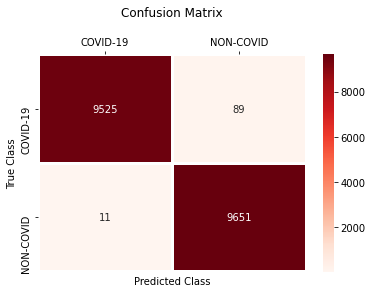

In [32]:
models["DenseNet121"].confusion_mat()

##### InceptionV3 Confusion Matrix

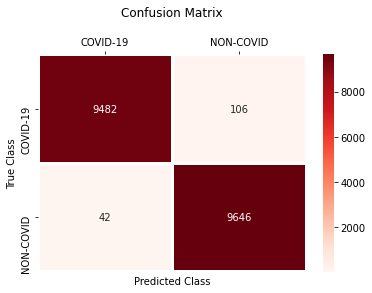

In [33]:
models["InceptionV3"].confusion_mat()

##### View the ROC curve of each model

Row 1 - VGG19
Row 2 - ResNet50
Row 3 - Xception
Row 4 - DenseNet121
Row 5 - InceptionV3


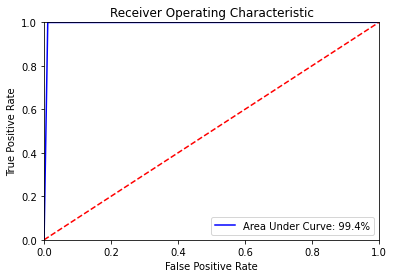

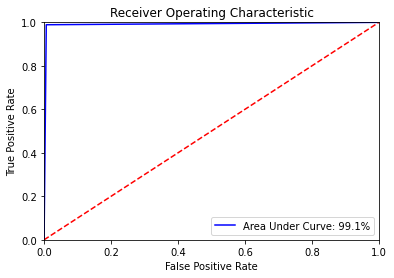

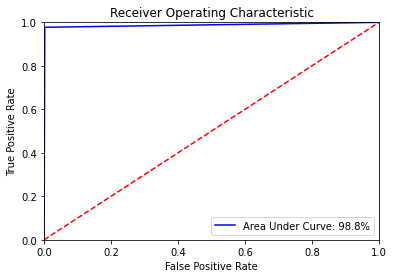

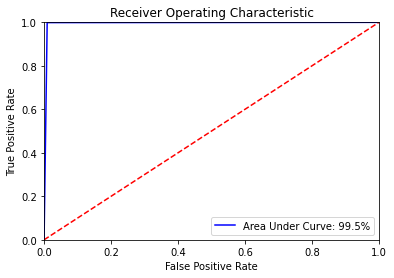

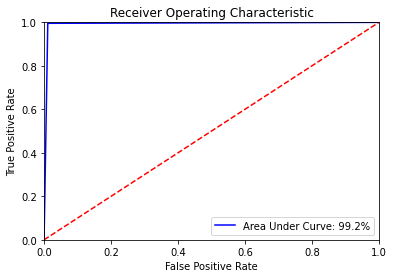

In [8]:
for index, model in enumerate(models):
    print(f"Row {index + 1} - {model}")
    models[model].roc()

##### Compare the accuracies of each pre-trained model against KyleNet

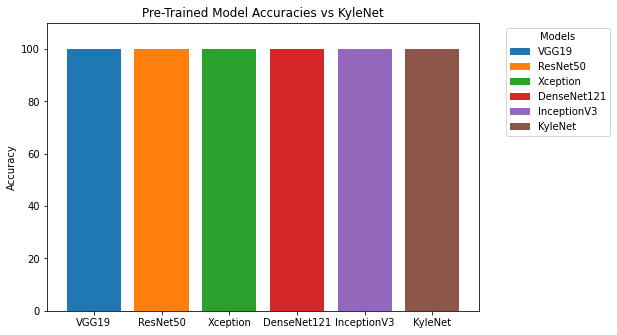

In [70]:
def random_color():
    tuple(np.random.random(size=3) * 255)

# Get the accuracies and model names of the models, KyleNets best result is added to the end of the array
accuracies = [models[model].history.history["val_accuracy"][-1] for model in models] + [99.94]
modelNames = [model for model in models] + ["KyleNet"]

# Build the plt fig
fig = plt.figure()
ax = fig.add_axes([1]*4)
ax.set_ylim(0,110)
ax.set_title("KyleNet Accuracy vs Pre-Trained Models")
ax.set_ylabel('Accuracy')

# Add a bar for each model with a random rgb colour
for index, model in enumerate(modelNames):
    ax.bar(model, accuracies[index], color=random_color())

ax.legend(labels=modelNames, title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
